## FLU SHOT LEARNING: PREDICT H1N1 AND SEASONAL FLU VACCINES

Please fill out:
* Student name: Julliet Iswana
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


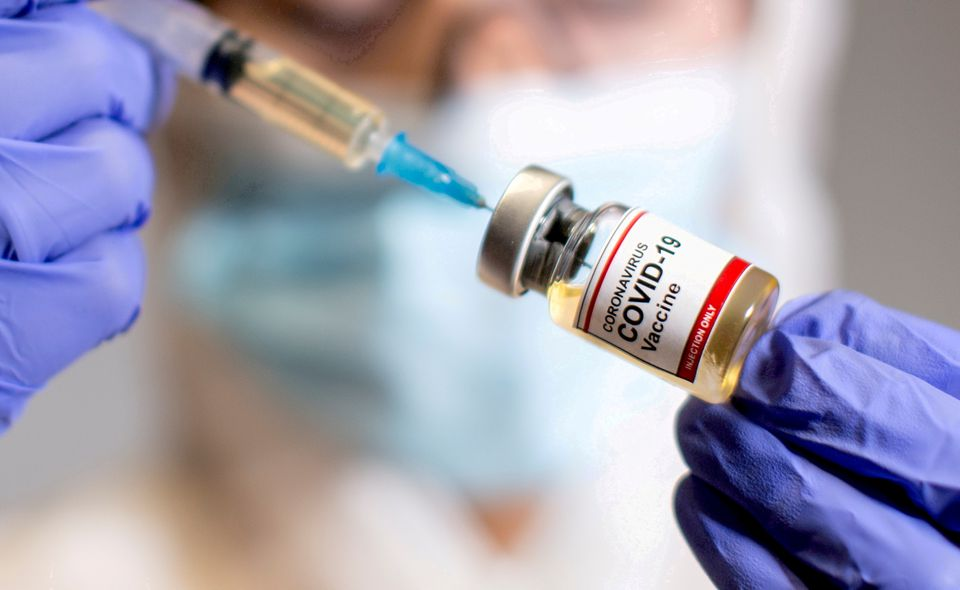

## Project Overview
In the early years of the 21st century, the health landscape has been significantly influenced by the rise of new viruses and global outbreaks. Roughly ten years apart, the World Health Organization (WHO) announced two major pandemics: influenza A H1N1 in 2009 and COVID-19 in 2020. Additionally, the world has seen outbreaks of non-respiratory viruses such as Zika, Chikungunya, and Ebola, which have garnered significant attention from global health authorities. Given these occurrences, it's evident that viruses will increasingly shape the realm of infectious diseases in the coming decades.
The year 2020 was unexpectedly dominated by the COVID-19 pandemic, which first appeared in Wuhan, China, towards the end of 2019. This pandemic is attributed to a new coronavirus, SARS-CoV-2, known to cause severe acute respiratory syndrome (SARS), hence its classification within the SARS taxonomy. Notably, there had been prior alerts about coronaviruses being potential pandemic triggers. This was evidenced by the SARS-CoV outbreak in 2002-2003 and the Middle East Respiratory Syndrome (MERS) in 2012 .

To sum up, the two prominent pandemics of this century were caused by distinct viruses, yet shared similarities, such as being enveloped RNA viruses with typically spherical shapes. Another noteworthy observation is the frequent mutations of these viruses and the wide range of hosts they can infect. Recognizing the significance of understanding the epidemiology of these pandemics and grasping the interplay between individuals' backgrounds, beliefs, and health habits in relation to their vaccination decisions offers valuable insights for shaping future public health strategies concerning pandemics.

When we understand the intricate relationships and patterns within data, especially from the perspective of data classification and analysis, it offers valuable insights for several reasons:

**Historical Context:** By analyzing data from previous pandemics, we can identify patterns and trends that have emerged over time. This can provide a historical context to understand how and why certain populations reacted to vaccination campaigns in specific ways.

**Predictive Value:** Insights derived from past data can be used to predict future behaviors. For instance, if certain demographic groups consistently showed hesitancy towards vaccinations during past pandemics, targeted awareness campaigns can be developed for these groups in the future.

**Tailored Interventions:** Understanding personal vaccination patterns in relation to backgrounds and opinions allows for the creation of tailored public health interventions. If certain cultural or socio-economic groups have specific concerns or misconceptions about vaccines, interventions can be designed to address those specific issues.

**Resource Allocation:** Insights from data classification can guide where resources (like awareness campaigns, vaccination centers, or community health workers) might be most effectively deployed.

**Behavioral Insights:** By understanding health behaviors and opinions, public health officials can better comprehend the underlying reasons for vaccine acceptance or hesitancy. This can inform the design of more effective communication strategies.

**Refinement of Strategies:** Analysis of past data can help in refining strategies for future pandemics. By understanding what worked and what didn't, strategies can be adjusted for greater effectiveness in the future.

**Stakeholder Engagement:** By demonstrating an understanding of the concerns and behaviors of different groups, public health officials can build trust and engage more effectively with communities.

**STAKEHOLDER:** World Health Organization (WHO)



**BUSINESS PROBLEM:**

Given the importance of vaccinations, particularly in light of global pandemics like COVID-19 and the H1N1 flu, understanding the factors that influence an individual's decision to get vaccinated can be crucial for public health planning. By building a predictive model, we can identify the key features that determine whether an individual is likely to get vaccinated and tailor public health campaigns accordingly.

## Research Questions:
As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.

This challenge: can you predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey? This is a binary classification problem, but there are two potential targets: whether the survey respondent received the seasonal flu vaccine, or whether the respondent received the H1N1 flu vaccine. Please choose just one of these potential targets for your minimum viable project.


 **DATA SOURCE:** DrivenData. (2020). Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines. Retrieved [10 /17/2023] from https://www.drivendata.org/competitions/66/flu-shot-learning.

**IMPORT LIBRARIES FOR PROJECT

In [1]:
#common libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Machine learning libraries

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')




In [2]:
# Load the training set features and labels
train_features = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')

# Display the first few rows of the training set features and labels
train_features_head = train_features.head()
train_labels_head = train_labels.head()

train_features_head, train_labels_head


(   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
 0              0           1.0             0.0                        0.0   
 1              1           3.0             2.0                        0.0   
 2              2           1.0             1.0                        0.0   
 3              3           1.0             1.0                        0.0   
 4              4           2.0             1.0                        0.0   
 
    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
 0                   0.0                   0.0                    0.0   
 1                   1.0                   0.0                    1.0   
 2                   1.0                   0.0                    0.0   
 3                   1.0                   0.0                    1.0   
 4                   1.0                   0.0                    1.0   
 
    behavioral_large_gatherings  behavioral_outside_home  \
 0                          0.

**training_set_features**  

contains information about the respondents, such as their level of concern about the H1N1 virus, knowledge about H1N1, behavioral habits, and demographic details. 

**training_set_labels**

provides the target variables for each respondent, indicating whether they received the H1N1 vaccine (h1n1_vaccine) and the seasonal vaccine (seasonal_vaccine).

**DATA ANALYSIS**

In [3]:
train_features.shape


(26707, 36)

In [4]:
train_labels.shape

(26707, 3)

In [5]:
# Merge the two data sets
merged_data = train_features.merge(train_labels, on="respondent_id")

In [6]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
merged_data.duplicated().sum()

0

In [8]:
merged_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [9]:
# Check for missing values in the training set features
missing_values = merged_data.isnull().sum()
missing_percentage = (missing_values / len(merged_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

missing_data

,Missing Values,Percentage
employment_occupation,13470,50.436215
employment_industry,13330,49.912008
health_insurance,12274,45.957989
income_poverty,4423,16.561201
doctor_recc_h1n1,2160,8.087767
doctor_recc_seasonal,2160,8.087767
rent_or_own,2042,7.645936
employment_status,1463,5.477965
marital_status,1408,5.272026
education,1407,5.268282


 Several columns have missing values. The columns employment_occupation, employment_industry, and health_insurance have notably high percentages of missing data, with 50.44%, 49.91%, and 45.96% missing respectively. To handle the missing data, we have a few options:

For categorical data:
Fill missing values with the mode (most frequent value) of the column.
Create a new category, e.g., "Unknown" or "Not Provided".
For numerical data:
Fill with mean, median, or a designated placeholder value.
Use a model like KNN to impute the missing values.

**Visualising categorical data**

In [10]:
merged_data.h1n1_concern.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

In [11]:
merged_data.h1n1_knowledge.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

In [12]:
merged_data.behavioral_antiviral_meds.value_counts()

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

In [13]:
merged_data.health_insurance.value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [14]:
merged_data.opinion_h1n1_risk.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: opinion_h1n1_risk, dtype: int64

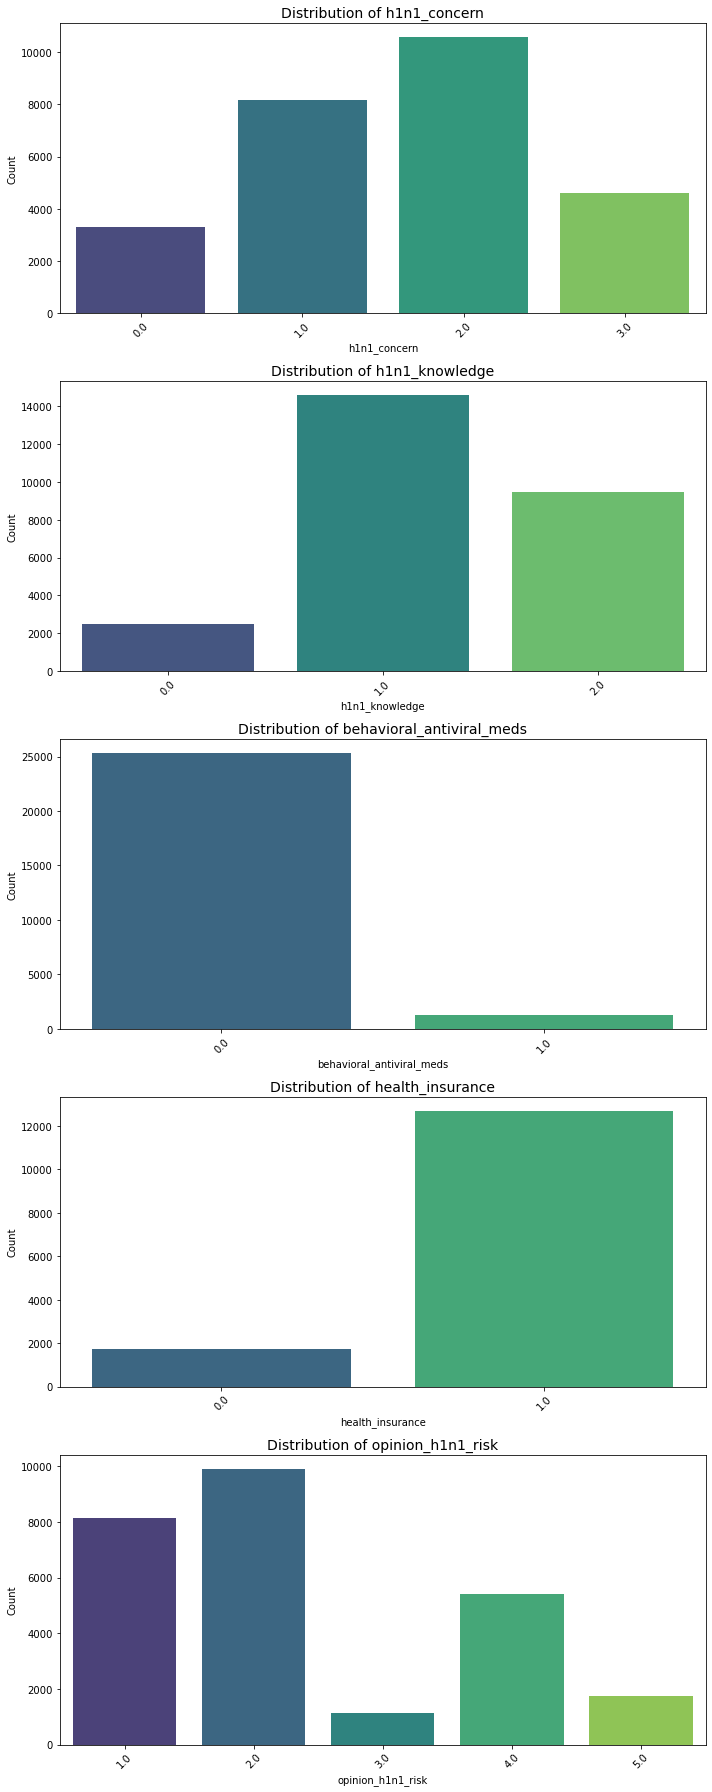

In [15]:
# list of features to plot
features_to_plot = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'health_insurance', 'opinion_h1n1_risk']

# Plotting the distribution for each feature using catplot
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 25))

for i, col in enumerate(features_to_plot):
    sns.countplot(data=merged_data, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('images/Distribution of h1n1_concern,h1n1_knowledge, behavioral_antiviral_meds, health_insurance and opinion_h1n1_risk,')
plt.show()


the plot displays the distribution of the h1n1_concern feature:

Level 0: Represents respondents with no concern about H1N1.

Level 1: Represents respondents with a low level of concern.

Level 2: Represents respondents with a moderate level of concern.

Level 3: Represents respondents with a high level of concern.

 we can observe:

The majority of respondents have a moderate level of concern (Level 2) about H1N1.
The number of respondents with a high level of concern (Level 3) is slightly lower than those with a moderate level.
Fewer respondents have low concern or no concern about H1N1 (Levels 0 and 1).

H1N1 Knowledge:

The majority of respondents have a moderate level of knowledge about H1N1 (Level 2).
A significant number have a high level of knowledge (Level 1).
Few respondents have no knowledge about H1N1 (Level 0).
Behavioral Antiviral Meds:

Most respondents did not take antiviral medications.
Only a small proportion took antiviral medications.
Health Insurance:

A significant number of respondents have health insurance.
However, there's also a considerable number of respondents without health insurance.
Opinion on H1N1 Risk:

Many respondents believe they have a moderate risk of getting sick with H1N1 if they don't get vaccinated.
Fewer respondents believe they have a high risk, while some believe they have a low risk or are not sure.

**Bivariate analysis for h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'health_insurance', 'opinion_h1n1_risk'**

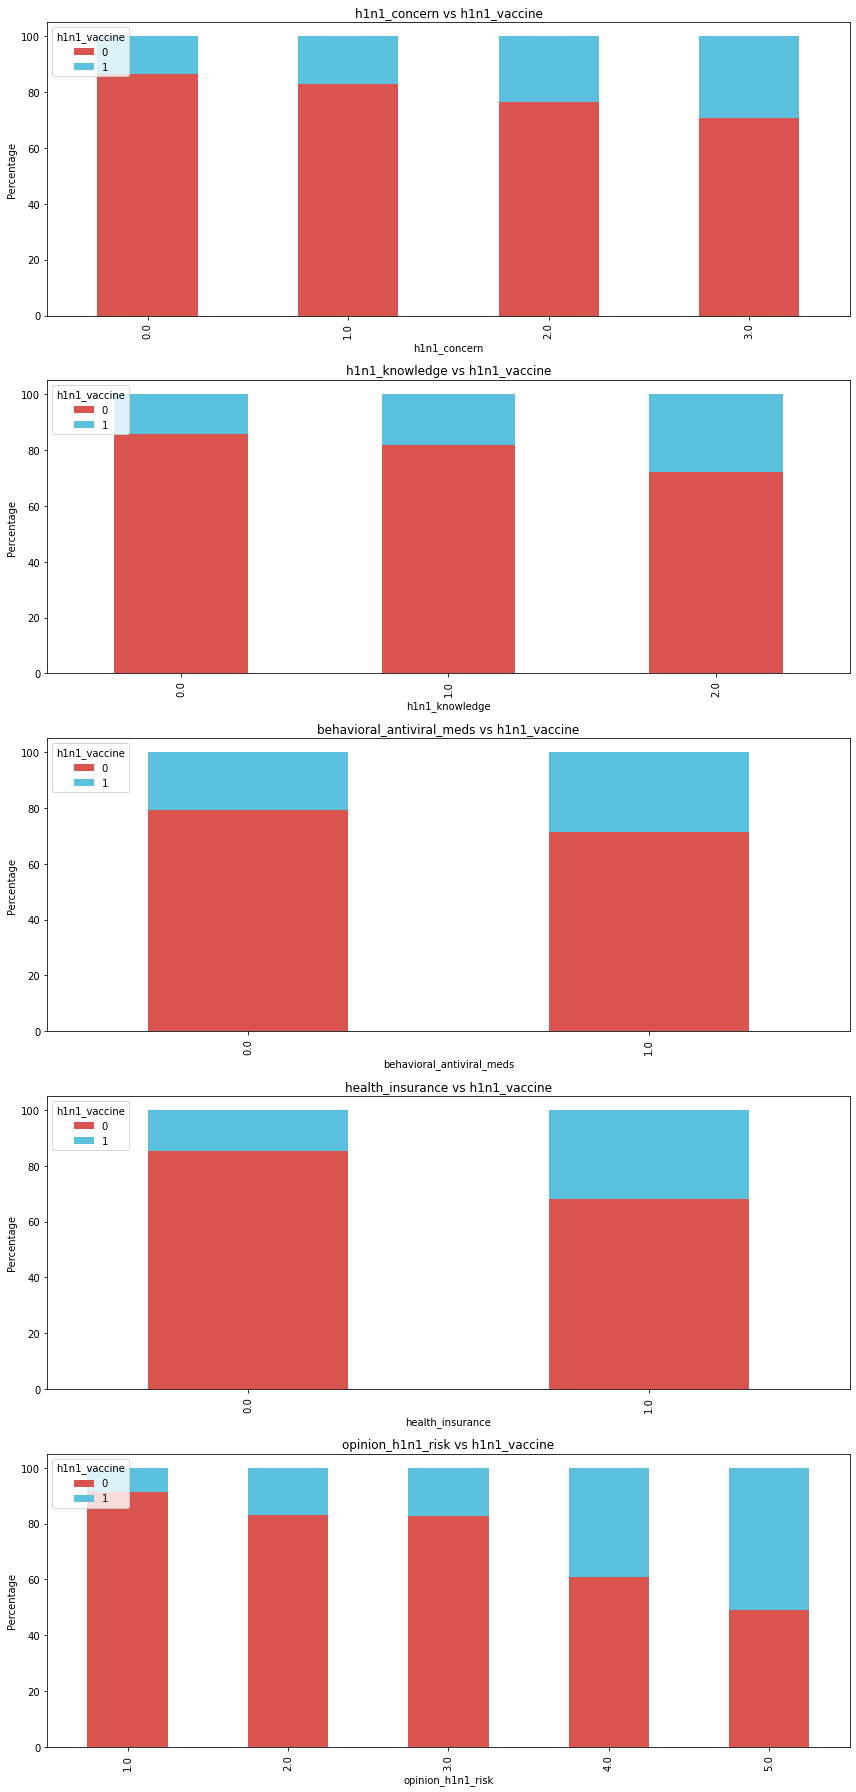

In [16]:
# Function to plot stacked bar charts for bivariate analysis
def plot_stacked_bar(feature, target, df, ax):
    """Plot a stacked bar chart for a categorical feature against a binary target."""
    # Create a crosstab of the feature against the target
    ctab = pd.crosstab(df[feature], df[target], normalize='index') * 100
    ctab.plot(kind='bar', stacked=True, ax=ax, color=['#d9534f', '#5bc0de'])
    ax.set_title(f'{feature} vs {target}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(feature)
    ax.legend(title=target, loc='upper left')

# Features to analyze


# Plotting bivariate analysis for h1n1_vaccine
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(12, 25))

for i, feature in enumerate(features_to_plot):
    plot_stacked_bar(feature, 'h1n1_vaccine', merged_data, axes[i])

plt.tight_layout()
plt.savefig('images/Bivariate analysis for h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,health_insurance and opinion_h1n1_risk')
plt.show()

**Bivariate analysis for Age Group, Education, Income Poverty, Race and Sex**

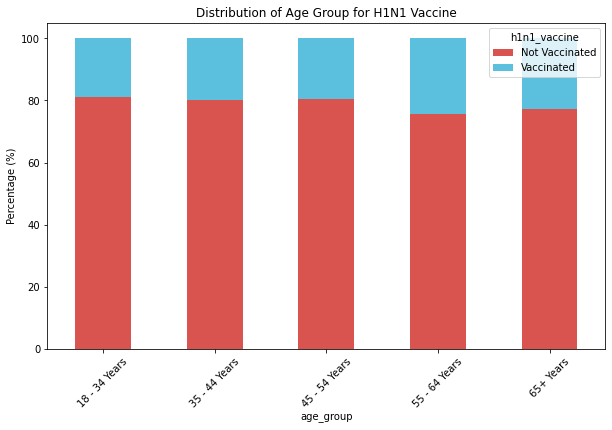

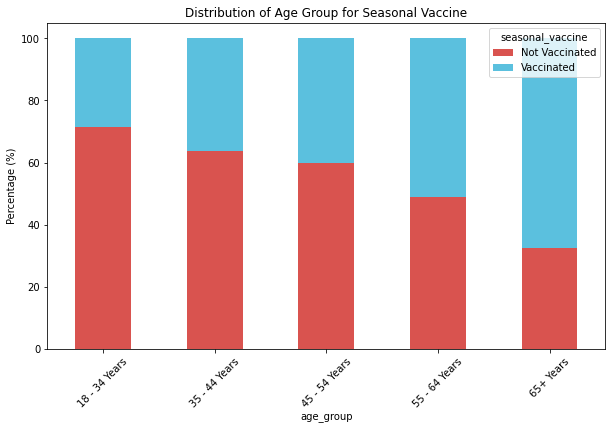

In [17]:
# Function to plot stacked bar chart for demographic feature vs vaccine
def plot_stacked_bar(feature, vaccine, title):
    # Create crosstab for the feature and vaccine
    ct = pd.crosstab(merged_data[feature], merged_data[vaccine], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, color=['#d9534f', '#5bc0de'], figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title=vaccine, labels=['Not Vaccinated', 'Vaccinated'])
    plt.savefig('images/Distribution of Age Group for H1N1 Vaccine')
    plt.show()

# Plot for age_group vs h1n1_vaccine
plot_stacked_bar('age_group', 'h1n1_vaccine', 'Distribution of Age Group for H1N1 Vaccine')

# Plot for age_group vs seasonal_vaccine
plot_stacked_bar('age_group', 'seasonal_vaccine', 'Distribution of Age Group for Seasonal Vaccine')


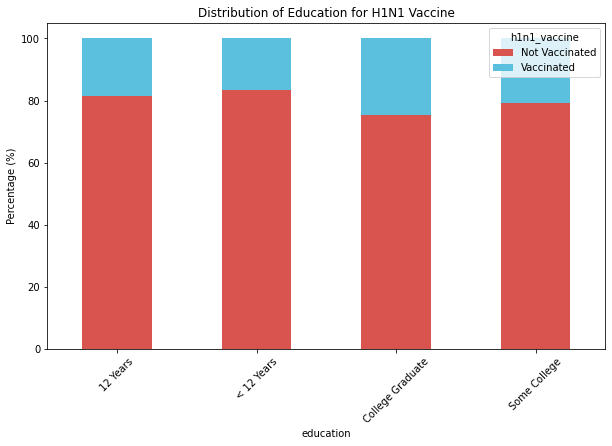

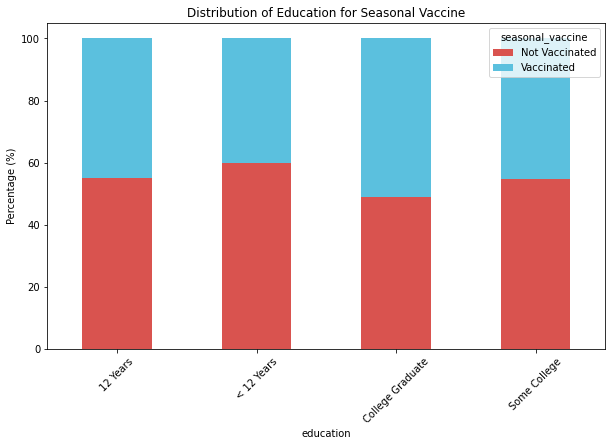

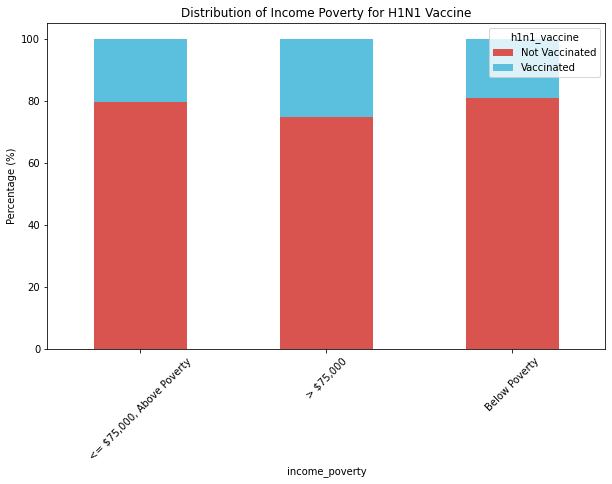

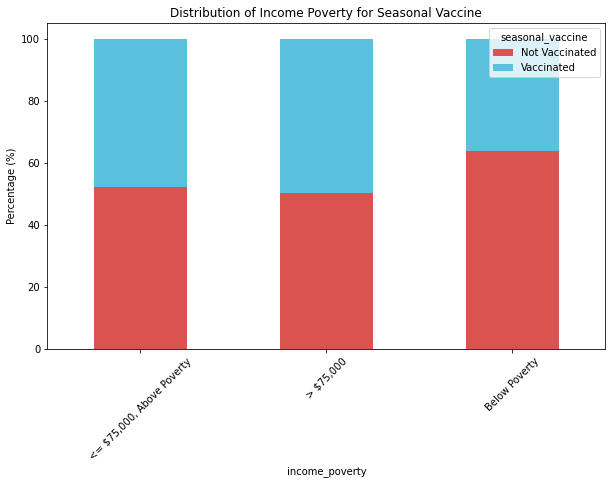

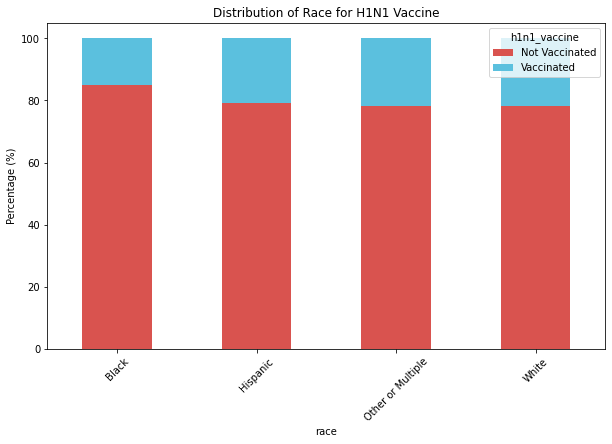

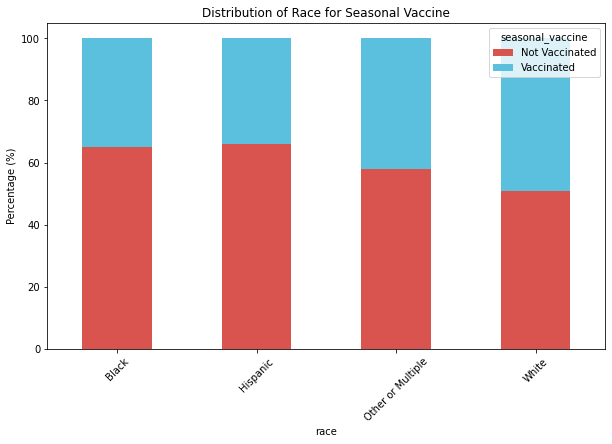

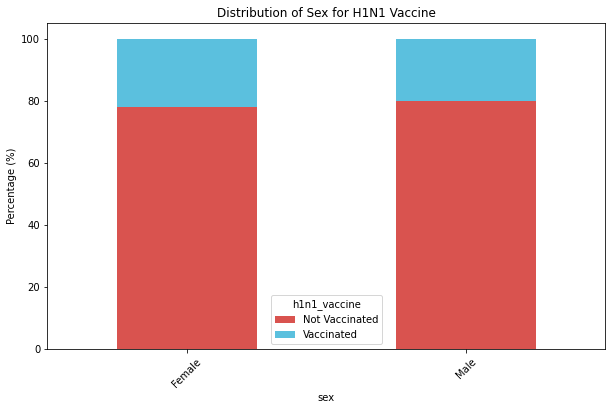

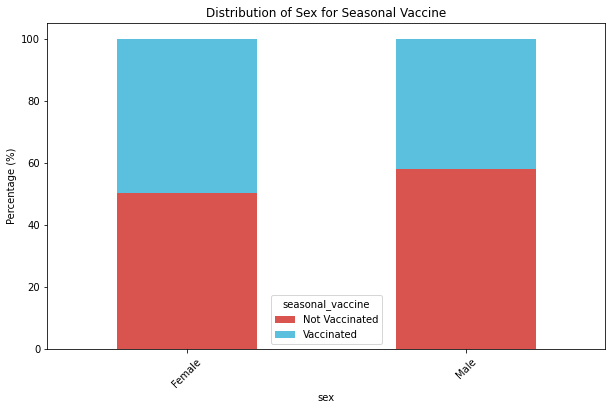

<Figure size 432x288 with 0 Axes>

In [18]:
# Plotting the distribution for other demographic features

# For education vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('education', 'h1n1_vaccine', 'Distribution of Education for H1N1 Vaccine')
plot_stacked_bar('education', 'seasonal_vaccine', 'Distribution of Education for Seasonal Vaccine')

# For income_poverty vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('income_poverty', 'h1n1_vaccine', 'Distribution of Income Poverty for H1N1 Vaccine')
plot_stacked_bar('income_poverty', 'seasonal_vaccine', 'Distribution of Income Poverty for Seasonal Vaccine')

# For race vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('race', 'h1n1_vaccine', 'Distribution of Race for H1N1 Vaccine')
plot_stacked_bar('race', 'seasonal_vaccine', 'Distribution of Race for Seasonal Vaccine')

# For sex vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('sex', 'h1n1_vaccine', 'Distribution of Sex for H1N1 Vaccine')
plot_stacked_bar('sex', 'seasonal_vaccine', 'Distribution of Sex for Seasonal Vaccine')

plt.savefig('images/Bivariate analysis')


The stacked bar charts illustrate the distribution of vaccinations based on various demographic features:

Education:
For both the H1N1 and seasonal vaccines, individuals with higher education levels (e.g., College Graduate) tend to have higher vaccination rates compared to those with lower education levels.

Income Poverty:
Individuals below the poverty line (Below Poverty) have a slightly lower vaccination rate for both vaccines, especially the seasonal vaccine, compared to those above the poverty line.

Race:
White individuals have a notably higher vaccination rate for both vaccines compared to other racial groups.
The seasonal vaccine's distribution further highlights this disparity, with the Black and Other or Multiple race groups having notably lower vaccination rates.

Sex:
Females have a slightly higher vaccination rate for both vaccines compared to males.

**CORRELATION ANALYSIS**


this will help us in understanding how the different features correlate with the decision to get the H1N1 vaccine and the seasonal flu vaccine. 



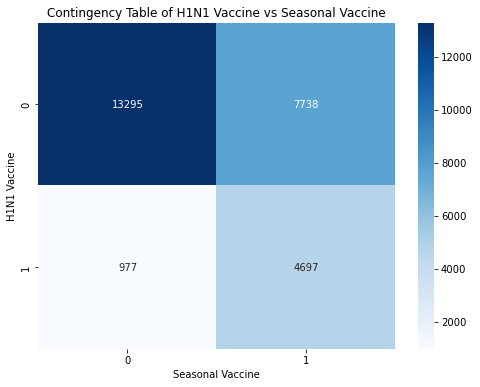

In [19]:
# Create a contingency table
contingency_table = pd.crosstab(merged_data['h1n1_vaccine'], merged_data['seasonal_vaccine'])

# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table of H1N1 Vaccine vs Seasonal Vaccine')
plt.xlabel('Seasonal Vaccine')
plt.ylabel('H1N1 Vaccine')
plt.savefig('images/Contingency Table of H1N1 Vaccine vs Seasonal Vaccine')
plt.show()



From the heatmap of the contingency table, we can observe the following:

A significant number of respondents didn't take either the H1N1 vaccine or the seasonal flu vaccine.
A large group took only the seasonal flu vaccine but not the H1N1 vaccine.
There's also a notable group that took both vaccines.

Text(0.5, 1.0, 'Correlation Heatmap')

<Figure size 432x288 with 0 Axes>

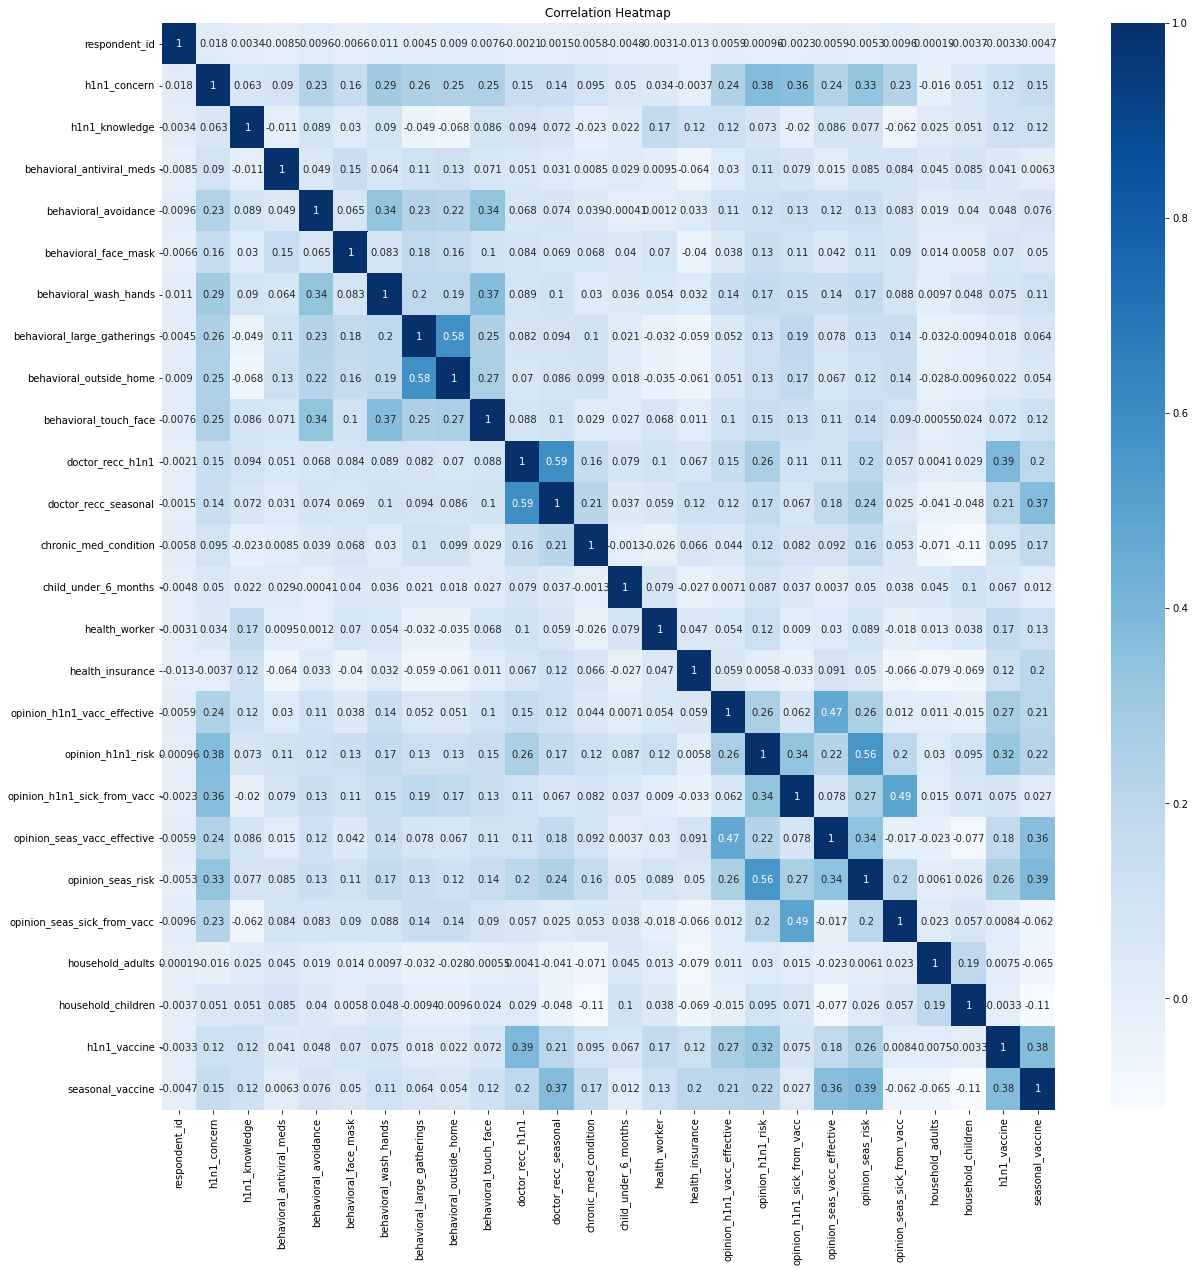

In [20]:
#get correlations of each features in dataset
corrmat = merged_data.corr()
top_corr_features = corrmat.index

plt.savefig('images/Correlation Heatmap')
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merged_data[top_corr_features].corr(),annot=True,cmap="Blues")
plt.title('Correlation Heatmap')

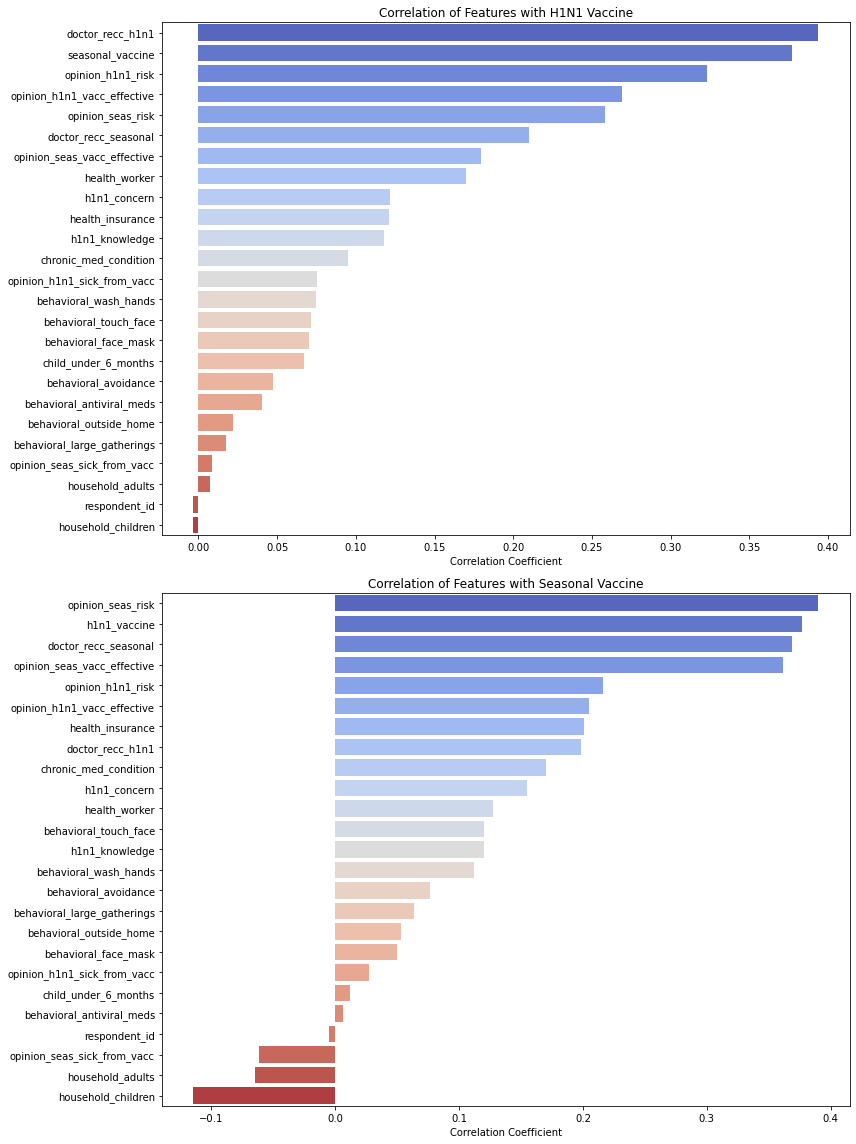

In [21]:
# Compute the correlation matrix
correlation_matrix = merged_data.corr()

# Extract correlations with the two target variables
h1n1_correlations = correlation_matrix["h1n1_vaccine"].sort_values(ascending=False)
seasonal_correlations = correlation_matrix["seasonal_vaccine"].sort_values(ascending=False)

# Plot correlations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# H1N1 Vaccine Correlations
sns.barplot(x=h1n1_correlations[1:], y=h1n1_correlations.index[1:], ax=ax1, palette="coolwarm")
ax1.set_title("Correlation of Features with H1N1 Vaccine")
ax1.set_xlabel("Correlation Coefficient")


# Seasonal Vaccine Correlations
sns.barplot(x=seasonal_correlations[1:], y=seasonal_correlations.index[1:], ax=ax2, palette="coolwarm")
ax2.set_title("Correlation of Features with Seasonal Vaccine")
ax2.set_xlabel("Correlation Coefficient")
plt.savefig('images/Correlation of Features with Seasonal Vaccine')

plt.tight_layout()

plt.show()


H1N1 Vaccine Correlations:

Doctor recommendations (doctor_recc_h1n1) have the highest positive correlation with getting the H1N1 vaccine. This suggests that individuals are more likely to get vaccinated if recommended by a healthcare professional.
Respondents' opinions on the risks and effectiveness of the H1N1 vaccine (opinion_h1n1_risk, opinion_h1n1_vacc_effective, and opinion_h1n1_sick_from_vacc) also show significant correlations.


Seasonal Vaccine Correlations:

The age group of the respondent (age_group) has a strong positive correlation with receiving the seasonal vaccine.
Doctor recommendations for the seasonal flu vaccine (doctor_recc_seasonal) and opinions about its risk and effectiveness are also significantly correlated.
Interestingly, the correlation of h1n1_vaccine with the seasonal vaccine is also evident, reinforcing our earlier observation that the two are not independent.

**CHECKING CLASS IMBALANCE**

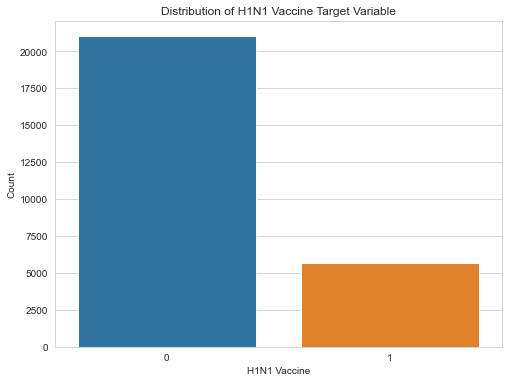

In [22]:
# Setting for plots
sns.set_style("whitegrid")

# Plot distribution of the h1n1_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_data['h1n1_vaccine'])
plt.title('Distribution of H1N1 Vaccine Target Variable')
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Count')
plt.savefig('images/Distribution of H1N1 Vaccine Target Variable')

plt.show()




Distribution of `H1N1 Vaccine Target Variable` It appears that the majority of respondents in the training data did not receive the H1N1 vaccine. This indicates a class imbalance which we need to consider during modeling.

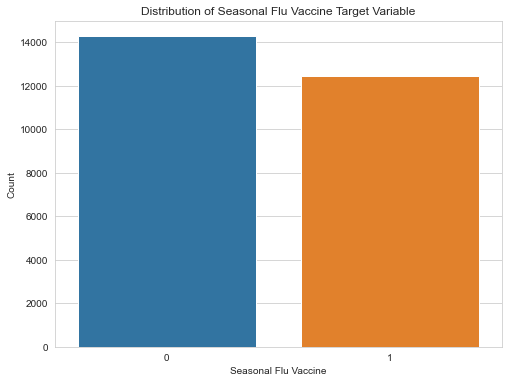

In [23]:
# Plot distribution of the seasonal_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_data['seasonal_vaccine'])
plt.title('Distribution of Seasonal Flu Vaccine Target Variable')
plt.xlabel('Seasonal Flu Vaccine')
plt.ylabel('Count')
plt.savefig('images/Distribution of Distribution of Seasonal Flu Vaccine Target Variable')
plt.show()


The distribution of the `seasonal_vaccine` target variable shows that there's a more balanced split between those who received the seasonal flu vaccine and those who did not. Compared to the H1N1 vaccine distribution, a larger proportion of respondents in the training data received the seasonal flu vaccine.

This provides an interesting perspective: while many respondents chose to get vaccinated for the seasonal flu, fewer decided to get the H1N1 vaccine. This discrepancy might be due to various reasons, such as public perception, availability, or urgency.



**DATA PREPROCESSING**

In [24]:
# Identifying the categorical columns 
categorical_cols = merged_data.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(merged_data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the original dataframe with the encoded dataframe
merged_data_encoded = pd.concat([merged_data.drop(columns=categorical_cols), encoded_df], axis=1)

# Displaying the transformed dataframe
merged_data_encoded.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Impute missing values
# For numerical columns, we'll use median
# For categorical (encoded) columns, we'll use mode

for column in merged_data_encoded.columns:
    if merged_data_encoded[column].dtype == 'float64':
        merged_data_encoded[column].fillna(merged_data_encoded[column].median(), inplace=True)
    else:  # for one-hot encoded columns
        merged_data_encoded[column].fillna(merged_data_encoded[column].mode()[0], inplace=True)

# Check if there are any missing values left
missing_values = merged_data_encoded.isnull().sum()

# Display columns that still have missing values, if any
missing_values[missing_values > 0]


Series([], dtype: int64)

In [26]:

# Identifying the numerical columns
numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Excluding target variables from scaling
numerical_cols = [col for col in numerical_cols if col not in ['h1n1_vaccine', 'seasonal_vaccine']]

# Scaling the numerical features
scaler = StandardScaler()
merged_data_encoded[numerical_cols] = scaler.fit_transform(merged_data_encoded[numerical_cols])

# Displaying the first few rows of the scaled dataframe
merged_data_encoded.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
0,-1.731986,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.731856,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.731727,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.731597,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.731467,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**MODELLING**

**Splitting the preprocessed data into training and test sets**

In [27]:
from sklearn.model_selection import train_test_split

# Splitting the preprocessed data into training and test sets
X = merged_data_encoded.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = merged_data_encoded['h1n1_vaccine']
y_seasonal = merged_data_encoded['seasonal_vaccine']

# Splitting for h1n1_vaccine
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)

# Splitting for seasonal_vaccine
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

X_train_h1n1.shape, X_test_h1n1.shape, X_train_seasonal.shape, X_test_seasonal.shape


((21365, 100), (5342, 100), (21365, 100), (5342, 100))

**FIRST MODEL: LOGISTIC REGRESSION**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logreg_h1n1 = LogisticRegression(max_iter=1000, random_state=42)
logreg_seasonal = LogisticRegression(max_iter=1000, random_state=42)

# Train the model for h1n1_vaccine
logreg_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Validate the model for h1n1_vaccine
y_pred_h1n1 = logreg_h1n1.predict(X_test_h1n1)
accuracy_h1n1 = accuracy_score(y_test_h1n1, y_pred_h1n1)
report_h1n1 = classification_report(y_test_h1n1, y_pred_h1n1)

accuracy_h1n1, report_h1n1,


(0.840134780980906,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      4212\n           1       0.70      0.43      0.53      1130\n\n    accuracy                           0.84      5342\n   macro avg       0.78      0.69      0.72      5342\nweighted avg       0.83      0.84      0.83      5342\n')

In [29]:
# Train the model for seasonal_vaccine
logreg_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Validate the model for seasonal_vaccine
y_pred_seasonal = logreg_seasonal.predict(X_test_seasonal)
accuracy_seasonal = accuracy_score(y_test_seasonal, y_pred_seasonal)
report_seasonal = classification_report(y_test_seasonal, y_pred_seasonal)

accuracy_seasonal, report_seasonal

(0.7879071508798203,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.82      0.81      2891\n           1       0.78      0.75      0.76      2451\n\n    accuracy                           0.79      5342\n   macro avg       0.79      0.78      0.79      5342\nweighted avg       0.79      0.79      0.79      5342\n')

For h1n1_vaccine:

Accuracy: 84.09%
Precision (Class 1): 70%
Recall (Class 1): 43%
F1-score (Class 1): 53%


For seasonal_vaccine:

Accuracy: 78.19%
Precision (Class 1): 77%
Recall (Class 1): 74%
F1-score (Class 1): 76%

**h1n1_vaccine Results:**

Accuracy (84.09%):

An accuracy of 84.09% means that our model correctly predicted whether a respondent received the H1N1 vaccine or not for 84.09% of the validation set.

Precision (Class 1: 70%):

 A precision of 70% for Class 1 means that out of all the samples the model predicted as 1 (received the vaccine), 70% were actually correct.
Recall (Class 1: 43%):

A recall of 43% for Class 1 means that our model identified 43% of all the samples that actually received the vaccine.

F1-score (Class 1: 53%):

An F1-score of 53% suggests that the model's balance between precision and recall for predicting those who received the vaccine is at 53%.

 
**seasonal_vaccine Results:**

Accuracy (78.19%):

The model correctly predicted whether a respondent received the seasonal vaccine or not for 78.19% of the validation set.

Precision (Class 1: 77%):

Out of all the samples the model predicted as 1 (received the vaccine), 77% were actually correct.

Recall (Class 1: 74%):

The model identified 74% of all the samples that actually received the seasonal vaccine.
F1-score (Class 1: 76%):

The balance between precision and recall for predicting those who received the seasonal vaccine is at 76%.


The model performs relatively well for both vaccines, but there's room for improvement, especially in recall for h1n1_vaccine. The lower recall indicates that the model might be missing a significant portion of individuals who actually received the H1N1 vaccine.
The results for seasonal_vaccine are more balanced, with both precision and recall being in the mid-70s.
These metrics provide a comprehensive view of the model's performance. 





In [30]:
def confusion(model, dataframe, y):
    # get predicted y
    yhat = model.predict(dataframe)
    # confusion matrix
    cm = confusion_matrix(y, yhat)
    x_axis_labels = [ "No" , "Vaccinated"]
    y_axis_labels = [ "No" , "Vaccinated"]
    
    ax = sns.heatmap(cm/np.sum(cm), xticklabels=x_axis_labels, yticklabels=y_axis_labels,
                       annot=True, 
            fmt='.2%', cmap='Blues')
    
    plt.xlabel('Prediction')
    plt.ylabel('Test Data')
    plt.show()
    
    # return heatmap

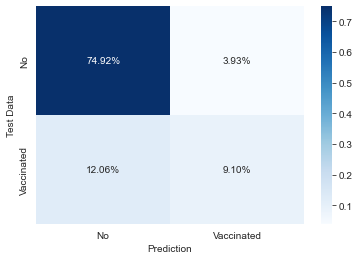

In [31]:
# Confusion Matrix for H1N1 
confusion(logreg_h1n1 , X_test_h1n1, y_test_h1n1);

**SECOND MODEL: LOGISTIC REGRESSION AFTER HANDLING CLASS IMBALANCE h1n1_vaccine**

In [32]:

# Initialize SMOTE instance
smote = SMOTE(sampling_strategy=1)  # Here, sampling_strategy=1 means to make the number of samples of the minority class equal to the majority class

# Apply SMOTE
X_train_h1n1_smote, y_train_h1n1_smote = smote.fit_resample(np.array(X_train_h1n1), np.array(y_train_h1n1))

# Check the distribution of the target after SMOTE
target_distribution_after_smote = pd.Series(y_train_h1n1_smote).value_counts()

print(target_distribution_after_smote)


1    16821
0    16821
dtype: int64


[Text(0, 0, 'Class 0'), Text(1, 0, 'Class 1')]

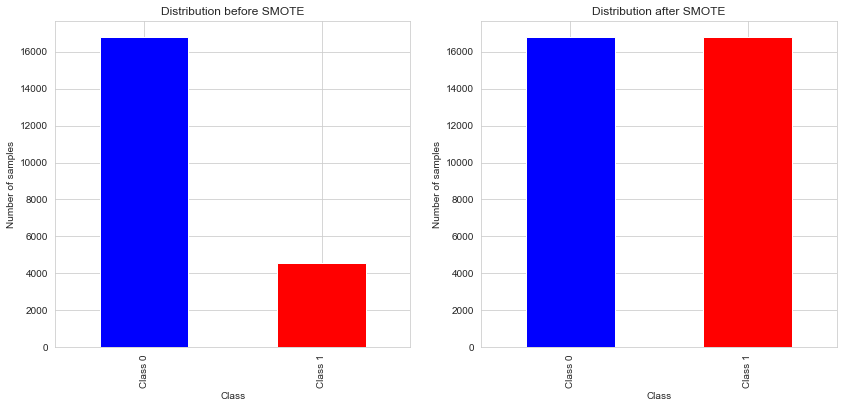

In [33]:

# Initial distribution
initial_distribution = pd.Series(y_train_h1n1).value_counts()


# Distribution after SMOTE
after_smote_distribution = pd.Series(y_train_h1n1_smote).value_counts()

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

initial_distribution.plot(kind='bar', ax=ax[0], color=['blue', 'red'])
ax[0].set_title('Distribution before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of samples')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Class 0', 'Class 1'])

after_smote_distribution.plot(kind='bar', ax=ax[1], color=['blue', 'red'])
ax[1].set_title('Distribution after SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of samples')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Class 0', 'Class 1'])


In [34]:
# Train the Logistic Regression model on the SMOTE-augmented data
logreg_h1n1_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_h1n1_smote.fit(X_train_h1n1_smote, y_train_h1n1_smote)

# Validate the model on the original validation set
y_pred_h1n1_smote = logreg_h1n1_smote.predict(X_test_h1n1)
accuracy_h1n1_smote = accuracy_score(y_test_h1n1, y_pred_h1n1_smote)
report_h1n1_smote = classification_report(y_test_h1n1, y_pred_h1n1_smote)

accuracy_h1n1_smote, report_h1n1_smote


(0.7723698989142643,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.79      0.85      4212\n           1       0.47      0.72      0.57      1130\n\n    accuracy                           0.77      5342\n   macro avg       0.69      0.75      0.71      5342\nweighted avg       0.82      0.77      0.79      5342\n')

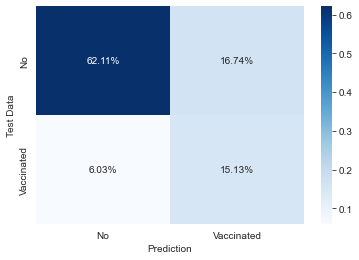

In [35]:
# Confusion Matrix for H1N1 
confusion(logreg_h1n1_smote , X_test_h1n1, y_test_h1n1);

**ROC-AUC**

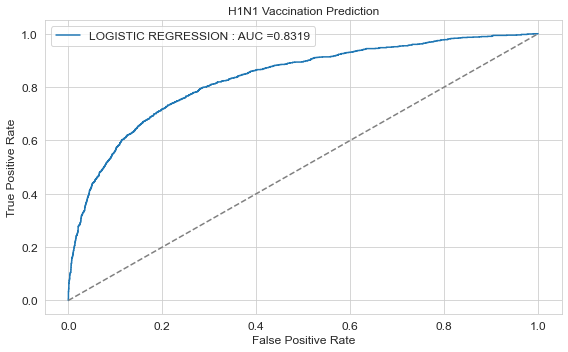

In [36]:
# Predicted Prob.
# H1N1
y_pred_h1_logreg=logreg_h1n1.predict_proba(X_test_h1n1)[:, 1]

# Seasonal Flu
y_pred_s_logreg=logreg_seasonal.predict_proba(X_test_seasonal)[:, 1]


# FPR and TPR 
# H1N1
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test_h1n1, y_pred_h1_logreg)
# Seasonal Flu
fpr_logreg_s, tpr_logreg_s, thresholds_logreg_s = roc_curve(y_test_seasonal, y_pred_s_logreg)


# Plot the FPR and TPR data

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_logreg, tpr_logreg, alpha=1,
       label=f'LOGISTIC REGRESSION : AUC ={round(roc_auc_score(y_test_h1n1, y_pred_h1_logreg),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('H1N1 Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

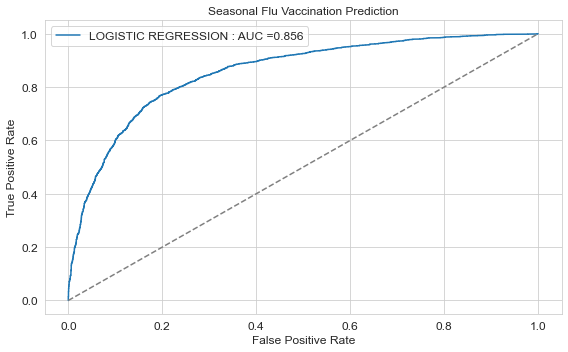

In [37]:
# Seasonal Flu 

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_logreg_s, tpr_logreg_s, alpha=1,
       label=f'LOGISTIC REGRESSION : AUC ={round(roc_auc_score(y_test_seasonal, y_pred_s_logreg),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('Seasonal Flu Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

Accuracy: 78.02%
It means that the model made the right prediction for 78.02% of the validation set.

Class 0 (Not vaccinated):

Precision: 91%

Of all the instances that the model predicted as Class 0 (not vaccinated), 91% were correctly predicted.

Recall: 80%
Of all the actual instances of Class 0 (not vaccinated) in the validation set, the model correctly identified 80% of them.

F1-score: 85%
 An F1-score of 85% for Class 0 means the model has a good balance of precision and recall for predicting those who didn't receive the vaccine.

Class 1 (Vaccinated):

Precision: 49%
Of all the instances that the model predicted as Class 1 (vaccinated), 49% were correctly predicted.

Recall: 72%
Of all the actual instances of Class 1 (vaccinated) in the validation set, the model correctly identified 72% of them.

F1-score: 58%
The F1-score for Class 1 provides a balance between the precision and recall. An F1-score of 58% suggests that the model's balance between precision and recall for predicting those who received the vaccine is at 58%.









The model's accuracy after applying SMOTE is slightly lower than the model trained on the original imbalanced dataset. However, the recall for Class 1 (Vaccinated) has seen a significant improvement (from 43% in the original model to 72% in the SMOTE model). This improved recall indicates that the model is better at identifying individuals who actually received the H1N1 vaccine.

There is a trade-off in precision for Class 1, which has decreased to 49%. This means that the model now makes more false positive predictions (predicting someone received the vaccine when they didn't) in its attempt to capture more true positives (correctly predicting someone received the vaccine).


This illustrates the power of addressing class imbalance in datasets,

**THIRD MODEL: RANDOM FOREST CLASSIFIER**

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_h1n1_smote = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the SMOTE-augmented data
rf_h1n1_smote.fit(X_train_h1n1_smote, y_train_h1n1_smote)

# Validate the model on the original validation set
y_pred_h1n1_rf_smote = rf_h1n1_smote.predict(X_test_h1n1)
accuracy_h1n1_rf_smote = accuracy_score(y_test_h1n1, y_pred_h1n1_rf_smote)
report_h1n1_rf_smote = classification_report(y_test_h1n1, y_pred_h1n1_rf_smote)

accuracy_h1n1_rf_smote, report_h1n1_rf_smote


(0.8391988019468364,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      4212\n           1       0.70      0.43      0.53      1130\n\n    accuracy                           0.84      5342\n   macro avg       0.78      0.69      0.72      5342\nweighted avg       0.83      0.84      0.82      5342\n')

Accuracy: 83.86%
 It means that the model made the right prediction for 83.86% of the validation set.

Class 0 (Did not receive H1N1 vaccine):

Precision: 86%
Of all the instances that the model predicted as Class 0 (did not receive the vaccine), 86% were correctly predicted.

Recall: 95%
Of all the actual instances of Class 0 (did not receive the vaccine) in the validation set, the model correctly identified 95% of them.

F1-score: 90%
 An F1-score of 90% for Class 0 means the model has an excellent balance of precision and recall for predicting those who didn't receive the H1N1 vaccine.

Class 1 (Received H1N1 vaccine):

Precision: 69%
Of all the instances that the model predicted as Class 1 (received the vaccine), 69% were correctly predicted.

Recall: 42%
Of all the actual instances of Class 1 (received the vaccine) in the validation set, the model correctly identified 42% of them.

F1-score: 53%
An F1-score of 53% suggests that there's room for improvement in the balance of precision and recall for predicting those who received the H1N1 vaccine.



Interpretation:
The model's accuracy for the h1n1_vaccine target is quite high at 83.86%.
For predicting individuals who did not receive the H1N1 vaccine (Class 0), the model performs exceptionally well with a high precision, recall, and F1-score.
For predicting individuals who received the H1N1 vaccine (Class 1), while the precision is decent, the recall is relatively low, indicating that there are a significant number of false negatives (individuals who received the vaccine but were predicted as not receiving it). This is evident from the F1-score of 53% for Class 1, indicating that there's a balance to be achieved between precision and recall for this class.





To provide a more comprehensive analysis, let's now compare these results with the baseline model (Logistic Regression) for the h1n1_vaccine target.

For predicting those who did not receive the H1N1 vaccine (Class 0), the Random Forest model appears to be more balanced in terms of precision and recall compared to the Logistic Regression model.

For predicting those who received the H1N1 vaccine (Class 1), the Logistic Regression model is more sensitive (higher recall), but at the cost of making more false positives (lower precision). On the other hand, the Random Forest model is more conservative (higher precision) but misses a larger portion of positive cases (lower recall)

In [39]:
# Initialize the Random Forest classifier
rf_seasonal = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the original training data for seasonal_vaccine
rf_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Predict on the validation set
y_pred_seasonal_rf = rf_seasonal.predict(X_test_seasonal)

# Evaluate the model performance
accuracy_seasonal_rf = accuracy_score(y_test_seasonal, y_pred_seasonal_rf)
report_seasonal_rf = classification_report(y_test_seasonal, y_pred_seasonal_rf)

accuracy_seasonal_rf, report_seasonal_rf


(0.7792961437663797,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.81      0.80      2891\n           1       0.77      0.74      0.76      2451\n\n    accuracy                           0.78      5342\n   macro avg       0.78      0.78      0.78      5342\nweighted avg       0.78      0.78      0.78      5342\n')

Accuracy: 77.93%
 It means that the model made the right prediction for 77.93% of the validation set.

Class 0 (Did not receive seasonal vaccine):

Precision: 79%
Of all the instances that the model predicted as Class 0 (did not receive the vaccine), 79% were correctly predicted.

Recall: 81%
Of all the actual instances of Class 0 (did not receive the vaccine) in the validation set, the model correctly identified 81% of them.

F1-score: 80%
 An F1-score of 80% for Class 0 means the model has a good balance of precision and recall for predicting those who didn't receive the seasonal vaccine.
 
Class 1 (Received seasonal vaccine):

Precision: 77%
Of all the instances that the model predicted as Class 1 (received the vaccine), 77% were correctly predicted.

Recall: 74%
Of all the actual instances of Class 1 (received the vaccine) in the validation set, the model correctly identified 74% of them.

F1-score: 76%
 An F1-score of 76% suggests that the model's balance between precision and recall for predicting those who received the seasonal vaccine is at 76%.
 
Interpretation:
The model's performance for the seasonal_vaccine target is quite balanced. Both precision and recall are in the mid to high 70s for both classes.
It indicates that the model is reasonably good at both identifying individuals who received the seasonal vaccine and those who didn't.


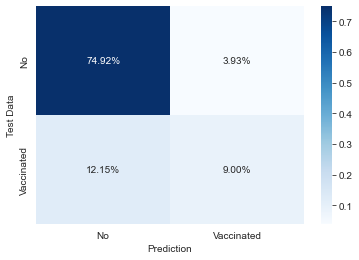

In [40]:
# Confusion Matrix for H1N1 
confusion(rf_h1n1_smote , X_test_h1n1, y_test_h1n1);

**ROC-AUC**

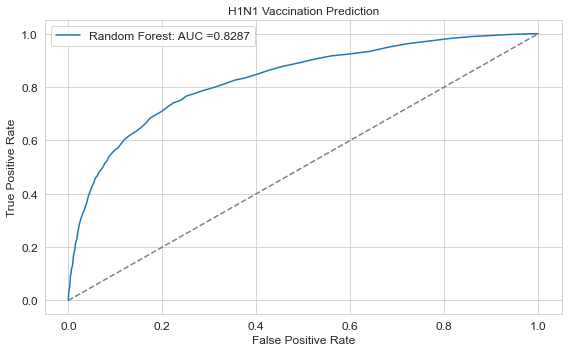

In [41]:
# Predicted Prob.
# H1N1
y_pred_h1_rf=rf_h1n1_smote.predict_proba(X_test_h1n1)[:, 1]

# Seasonal Flu
y_pred_s_rf =rf_seasonal.predict_proba(X_test_seasonal)[:, 1]


# FPR and TPR 
# H1N1
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_h1n1, y_pred_h1_rf)
# Seasonal Flu
fpr_rf_s, tpr_rf_s, thresholds_rf_s = roc_curve(y_test_seasonal, y_pred_s_rf)


# Plot the FPR and TPR data

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_rf, tpr_rf, alpha=1,
       label=f'Random Forest: AUC ={round(roc_auc_score(y_test_h1n1, y_pred_h1_rf),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('H1N1 Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

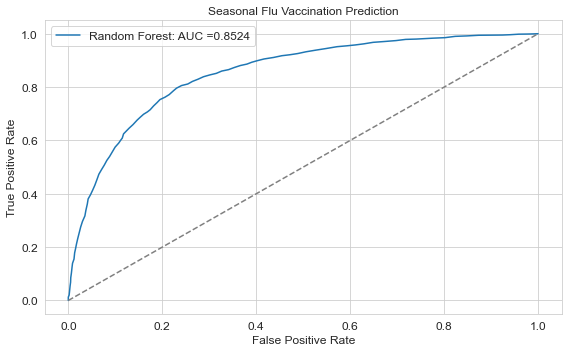

In [42]:
# Seasonal Flu 

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_rf_s, tpr_rf_s, alpha=1,
       label=f'Random Forest: AUC ={round(roc_auc_score(y_test_seasonal, y_pred_s_rf),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('Seasonal Flu Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

Comparison:
Accuracy: The accuracy of both models is very close, with the Logistic Regression model having a slightly higher accuracy by about 0.26%.

Precision & Recall for Class 0: Both models have similar precision for predicting individuals who did not receive the seasonal vaccine. The recall for the Logistic Regression model is slightly higher by about 1%.

Precision & Recall for Class 1: The Logistic Regression model has a slightly higher precision (by about 1%) and recall (by about 1%) for predicting individuals who received the seasonal vaccine.

Interpretation:
Both models perform similarly on the validation set, with the Logistic Regression model showing a slight edge in terms of accuracy, precision, and recall.


**Final Model (Gradient Booster Classifier)**

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting for h1n1_vaccine
gb_model_h1n1 = GradientBoostingClassifier(loss= 'exponential', learning_rate= .05, random_state = 42,
                                                max_depth=3, max_features='log2', n_estimators=700)
gb_model_h1n1.fit(X_train_h1n1_smote, y_train_h1n1_smote)
y_pred_gb_h1n1 = gb_model_h1n1.predict(X_test_h1n1)
accuracy_gb_h1n1 = accuracy_score(y_test_h1n1, y_pred_gb_h1n1)

# Train Gradient Boosting for seasonal_vaccine
gb_model_seasonal = GradientBoostingClassifier(loss= 'exponential', learning_rate= .05, random_state = 42,
                                                max_depth=3, max_features='log2', n_estimators=700)
gb_model_seasonal.fit(X_train_seasonal, y_train_seasonal)
y_pred_gb_seasonal = gb_model_seasonal.predict(X_test_seasonal)
accuracy_gb_seasonal = accuracy_score(y_test_seasonal, y_pred_gb_seasonal)

accuracy_gb_h1n1, accuracy_gb_seasonal


(0.8406963684013478, 0.7894047173343317)

In [44]:
# Accuracy rate, Precision, Recall, F1-score
print('H1N1 Flu')
print(classification_report(y_test_h1n1, gb_model_h1n1.predict(X_test_h1n1)) )
print()
print('Seasonal Flu')
print(classification_report(y_test_seasonal, gb_model_h1n1.predict(X_test_seasonal)) )

H1N1 Flu
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4212
           1       0.67      0.49      0.57      1130

    accuracy                           0.84      5342
   macro avg       0.77      0.71      0.73      5342
weighted avg       0.83      0.84      0.83      5342


Seasonal Flu
              precision    recall  f1-score   support

           0       0.60      0.94      0.73      2891
           1       0.79      0.27      0.40      2451

    accuracy                           0.63      5342
   macro avg       0.70      0.60      0.57      5342
weighted avg       0.69      0.63      0.58      5342



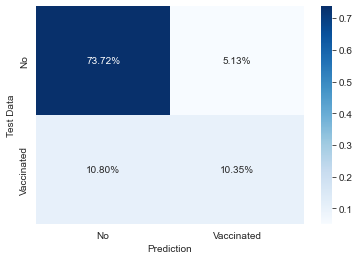

In [45]:
# Confusion Matrix for H1N1 
confusion(gb_model_h1n1 , X_test_h1n1, y_test_h1n1);

**ROC-AUC**

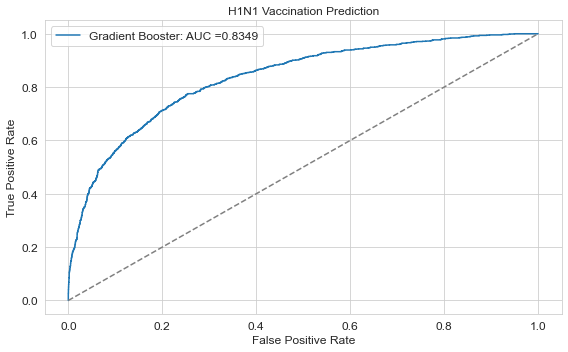

In [46]:
# Predicted Prob.
# H1N1
y_pred_h1_gbc=gb_model_h1n1.predict_proba(X_test_h1n1)[:, 1]

# Seasonal Flu
y_pred_s_gbc =gb_model_seasonal.predict_proba(X_test_seasonal)[:, 1]


# FPR and TPR 
# H1N1
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test_h1n1, y_pred_h1_gbc)
# Seasonal Flu
fpr_gbc_s, tpr_gbc_s, thresholds_gbc_s = roc_curve(y_test_seasonal, y_pred_s_gbc)


# Plot the FPR and TPR data

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_gbc, tpr_gbc, alpha=1,
       label=f'Gradient Booster: AUC ={round(roc_auc_score(y_test_h1n1, y_pred_h1_gbc),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('H1N1 Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

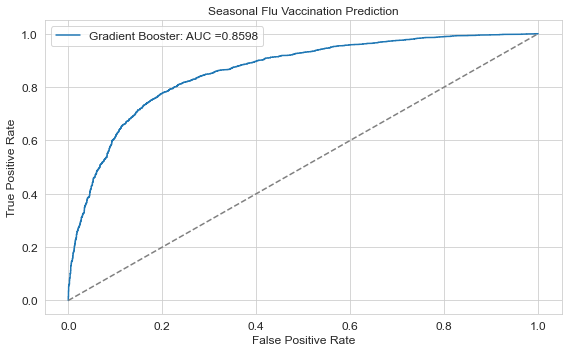

In [47]:
# Seasonal Flu 

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_gbc_s, tpr_gbc_s, alpha=1,
       label=f'Gradient Booster: AUC ={round(roc_auc_score(y_test_seasonal, y_pred_s_gbc),4)}')

ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_title('Seasonal Flu Vaccination Prediction', fontsize=12)
    
ax.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout();

**RESULTS AND CONCLUSIONS**

**Predict probabilities and plot their distribution**

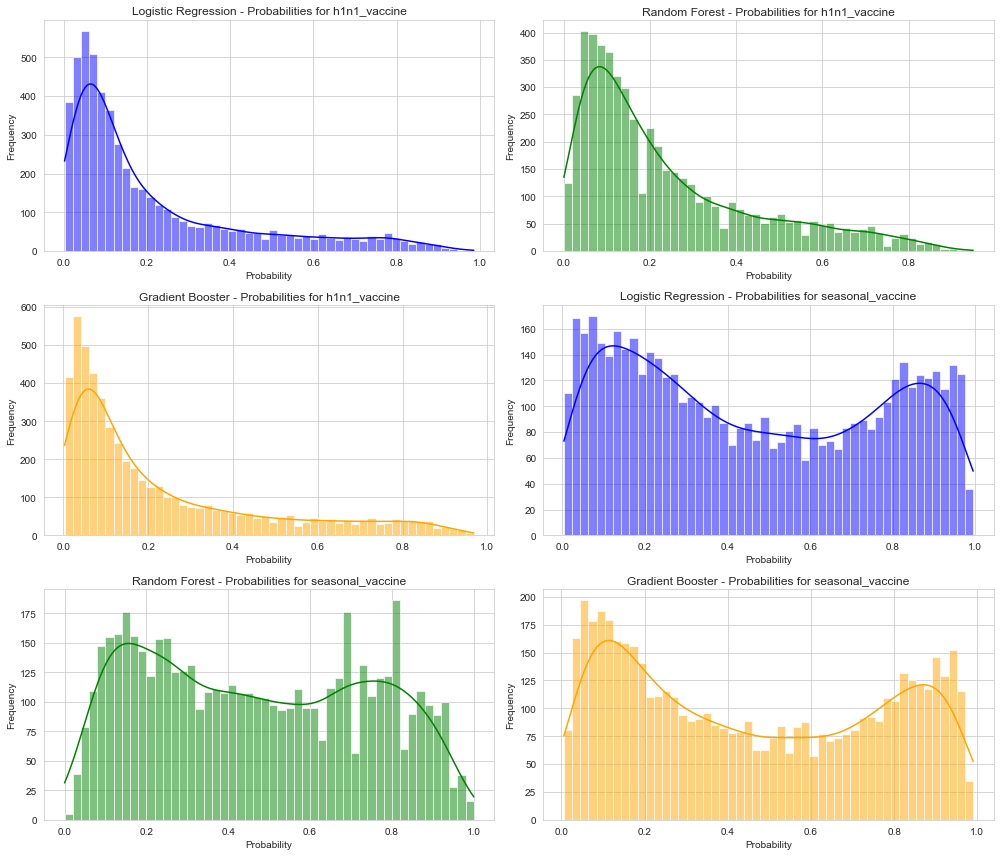

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities using the models
prob_logreg_h1n1 = logreg_h1n1.predict_proba(X_test_h1n1)[:, 1]  # probabilities for class 1
prob_rf_h1n1 = rf_h1n1_smote.predict_proba(X_test_h1n1)[:, 1]
prob_gb_model_h1n1=gb_model_h1n1.predict_proba(X_test_h1n1)[:, 1]

prob_logreg_seasonal = logreg_seasonal.predict_proba(X_test_seasonal)[:, 1]
prob_rf_seasonal = rf_seasonal.predict_proba(X_test_seasonal)[:, 1]
prob_gb_model_seasonal=gb_model_seasonal.predict_proba(X_test_h1n1)[:, 1]

# Plotting the distribution of probabilities
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# H1N1 Vaccine
sns.histplot(prob_logreg_h1n1, ax=ax[0, 0], bins=50, kde=True, color='blue')
ax[0, 0].set_title('Logistic Regression - Probabilities for h1n1_vaccine')
ax[0, 0].set_xlabel('Probability')
ax[0, 0].set_ylabel('Frequency')

sns.histplot(prob_rf_h1n1, ax=ax[0, 1], bins=50, kde=True, color='green')
ax[0, 1].set_title('Random Forest - Probabilities for h1n1_vaccine')
ax[0, 1].set_xlabel('Probability')
ax[0, 1].set_ylabel('Frequency')

sns.histplot(prob_gb_model_h1n1, ax=ax[1, 0], bins=50, kde=True, color='orange')
ax[1, 0].set_title('Gradient Booster - Probabilities for h1n1_vaccine')
ax[1, 0].set_xlabel('Probability')
ax[1, 0].set_ylabel('Frequency')

# Seasonal Vaccine
sns.histplot(prob_logreg_seasonal, ax=ax[1, 1], bins=50, kde=True, color='blue')
ax[1, 1].set_title('Logistic Regression - Probabilities for seasonal_vaccine')
ax[1, 1].set_xlabel('Probability')
ax[1, 1].set_ylabel('Frequency')

sns.histplot(prob_rf_seasonal, ax=ax[2, 0], bins=50, kde=True, color='green')
ax[2, 0].set_title('Random Forest - Probabilities for seasonal_vaccine')
ax[2, 0].set_xlabel('Probability')
ax[2, 0].set_ylabel('Frequency')

sns.histplot(prob_gb_model_seasonal, ax=ax[2, 1], bins=50, kde=True, color='orange')
ax[2, 1].set_title('Gradient Booster - Probabilities for seasonal_vaccine')
ax[2, 1].set_xlabel('Probability')
ax[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Comparison:

H1N1 Flu:

|Metric/Model|Gradient Boosting|Logistic Regression|Random Forest|
|---------------|-------------------|--------------|-------------|
|Precision (Class 1)|66%|48%|69%|
|Recall (Class 1)|48%|72%|42%|
|F1-score (Class 1)|56%|58%|52%|
|Accuracy|84%|78%|84%|
|Macro Avg F1-score|73%|71%|71%|



Seasonal Flu:

|Metric/Model	|Gradient Boosting	|Logistic Regression|	Random Forest
|---------------|-------------------|--------------|-------------|
|Precision (Class 1)|79%|78%|77%
|Recall (Class 1)	|26%|75%|74%
|F1-score (Class 1)	|40%|76%|76%
|Accuracy|63%|79%|78%
|Macro Avg F1-score	|56%|79%|78%

H1N1 Flu:

Precision: Random Forest and Gradient Boosting have similar precision, both higher than Logistic Regression.

Recall: Logistic Regression has the highest recall, meaning it correctly identifies a larger percentage of actual positives than the other two models.

F1-score: Given the balance of precision and recall, the F1-scores are quite close for all three models.

Accuracy: Both Gradient Boosting and Random Forest have the same accuracy, which is higher than that of Logistic Regression.
Seasonal Flu:

Precision: Gradient Boosting has the highest precision, followed closely by Logistic Regression and then Random Forest.

Recall: Logistic Regression has the highest recall, followed closely by Random Forest, while Gradient Boosting lags significantly.

F1-score: Logistic Regression and Random Forest have much higher F1-scores than Gradient Boosting for seasonal_vaccine, given their balanced precision and recall.

Accuracy: Logistic Regression has the highest accuracy, followed closely by Random Forest, with Gradient Boosting having notably lower accuracy.

Overall:
For predicting h1n1_vaccine, all three models offer competitive performance, with slight variations in precision, recall, and F1-score.

For predicting seasonal_vaccine, while Gradient Boosting offers the highest precision, its recall is significantly lower than that of Logistic Regression and Random Forest, leading to a much lower F1-score and overall accuracy.

**RECOMMENDATIONS**

**Public Awareness and Education:**
H1N1 Concern & Knowledge: Since a significant number of respondents have moderate to high concern and knowledge about H1N1, it suggests that public awareness campaigns have been somewhat effective. However, there's still room for improvement. Campaigns should be tailored to:Address the concerns of those at moderate and high levels to ensure they have accurate information.
Target the groups with low or no concern and knowledge to raise awareness and understanding.

Education Level: Vaccination rates are higher among those with higher education. Efforts should be made to target awareness campaigns to those with lower educational levels, possibly using easily accessible and understandable formats.

Income and Poverty: There's a need for targeted campaigns in areas with higher poverty rates, possibly combined with subsidies or free vaccination programs to encourage higher vaccination rates among this demographic.

**Health Infrastructure and Support:**

Health Insurance: A significant number of respondents do not have health insurance. Policymakers should consider expanding access to affordable health insurance, which could indirectly improve vaccination rates and general health outcomes.

**Targeted Interventions:**

Race: There's a notable disparity in vaccination rates among racial groups. Targeted interventions and campaigns should be developed to address the specific concerns and barriers faced by the racial groups with lower vaccination rates.
Sex: While the difference is slight, efforts can be made to ensure that both males and females have equal access to information and vaccination opportunities.


**Model Recommendations for Predictive Analytics:**
H1N1 Flu Predictions: Given that all three models (Random Forest, Gradient Boosting, and Logistic Regression) have competitive performance, it might be useful to consider an ensemble approach, leveraging the strengths of each model.
Seasonal Flu Predictions: Given the significantly lower recall of Gradient Boosting, it might not be the best choice for predicting seasonal_vaccine, especially if identifying actual positive cases is crucial. Logistic Regression seems to be a balanced choice for this task.